In [1]:
%matplotlib inline
from fns import *
from fns.functionsTF import *

In [2]:
params = []
res = []
config = load_config()
glist = [1,5,7]
    
for g in glist:
    T = 120000

    gpu = TfConnEvolveNet(config=config, T=T)

    # number of excitatory neurons
    gpu.NE1=800
    # number of inhibitory neurons
    gpu.NI1=200

    # mean input drive
    gpu.nu = 120
    gpu.device = '/gpu:0'

    # mean initial gap junction coupling
    gpu.g1 = g

    # do not save the spikes
    gpu.spikeMonitor = False
    # do not save the individual voltages, currents, etc.
    gpu.monitor_single = False

    # iteration 
    gpu.stabTime = 1

    # rule: g0 = 0 for no bound rule, g0 = 10 for softbound rule
    gpu.g0 = 10

    gpu.runTFSimul()
    res.append(gpu)
    del gpu  
    gc.collect()

1000 800 200
1000 800 200


100%|██████████| 120000/120000 [06:55<00:00, 289.01it/s]



415.54

1000 800 200
1000 800 200


100%|██████████| 120000/120000 [06:57<00:00, 287.10it/s]



418.37

1000 800 200
1000 800 200


100%|██████████| 120000/120000 [06:56<00:00, 288.15it/s]



416.65



In [3]:
## Evolution of the mean gap junction coupling

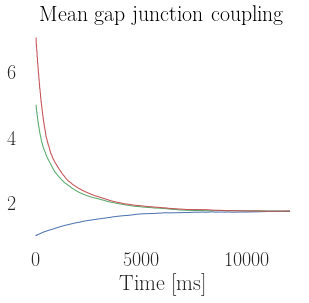

In [15]:
scale = res[1].gm1[0]/5

for i in range(3):
    plt.plot(res[i].gm1/scale)
plt.title('Mean gap junction coupling')
plt.xlabel('Time [ms]')